### importing and Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('../Data/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv')
df2 = pd.read_csv('../Data/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv')
df3 = pd.read_csv('../Data/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv')
df4 = pd.read_csv('../Data/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv')
df5 = pd.read_csv('../Data/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv')

In [3]:
df1.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
df5.tail()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
71695,29-12-2025,West Bengal,West Midnapore,721212,0,12
71696,29-12-2025,West Bengal,West Midnapore,721420,0,1
71697,29-12-2025,West Bengal,West Midnapore,721424,0,5
71698,29-12-2025,West Bengal,West Midnapore,721426,0,3
71699,29-12-2025,West Bengal,hooghly,712701,0,1


#### merging data


In [5]:
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)


In [6]:
df.shape

(2071700, 6)

In [7]:
df.tail()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3
2071699,29-12-2025,West Bengal,hooghly,712701,0,1


In [8]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


### Basic Overview and transformation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [10]:
df.isna().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

This is only a data quality check.

- There are no missing values in any column.

- The dataset is complete and clean with respect to nulls.

In [11]:
df.duplicated().sum()

np.int64(473601)

In [12]:
df[df.duplicated()]

,date,state,district,pincode,demo_age_5_17,demo_age_17_
227394,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17
227395,26-10-2025,Tamil Nadu,Krishnagiri,635306,6,3
227396,26-10-2025,Tamil Nadu,Krishnagiri,635307,5,17
227397,26-10-2025,Tamil Nadu,Krishnagiri,635654,1,1
227398,26-10-2025,Tamil Nadu,Krishnagiri,636806,1,3
...,...,...,...,...,...,...
2069815,29-12-2025,Andhra Pradesh,Cuddapah,516004,0,4
2069816,29-12-2025,Andhra Pradesh,Cuddapah,516151,0,1
2069817,29-12-2025,Andhra Pradesh,Cuddapah,516173,0,4
2069818,29-12-2025,Andhra Pradesh,Cuddapah,516175,1,2


The demographic update dataset contains an unusually high proportion of duplicate records (~23%), indicating significant data ingestion or ETL pipeline issues. Without de-duplication, any analytical results derived from this dataset would be substantially inflated and misleading.

It does NOT mean:

- demographic data are duplicated

- Citizens are duplicated

- Aadhaar records are wrong

- Data is fake

Typical causes:

- Repeated batch uploads

- Failed retry mechanisms

- Lack of primary-key enforcement on (date, state, district, pincode)

- ETL job replays without deduplication

Why this is critical:

- Nearly 1 out of every 4 records is a duplicate.

- Any aggregation (state-wise, district-wise, daily totals, age-wise distribution) is currently:

- Severely inflated

- Statistically unreliable

- our demographic update volume is being artificially multiplied.

Biometric dataset duplicates ≈ 5%

Demographic dataset duplicates ≈ 23%

So demographic data has much worse ingestion integrity.


So this single line of code revealed:

dataset has integrity leakage.

so we going to remove this duplicate.

In [13]:
df = df.drop_duplicates()


In [14]:
df.shape

(1598099, 6)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")


In [17]:
print(df['date'].min().date())
print(df['date'].max().date())

2025-03-01
2025-12-29


In [18]:
df = df.sort_values(by='date')


In [19]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529
832533,2025-03-01,Punjab,Shaheed Bhagat Singh Nagar,144522,18,122
832534,2025-03-01,Chhattisgarh,Baloda Bazar,493222,15,673
832535,2025-03-01,Karnataka,Belagavi,591235,152,147
832536,2025-03-01,Andhra Pradesh,Anantapur,515408,12,314


### Analysis start

In [20]:
df['date'].nunique()

95

In [ ]:
total_days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].nunique()
print(total_days_per_month)


date
2025-03     1
2025-04     1
2025-05     1
2025-06     1
2025-07     1
2025-09    20
2025-10    18
2025-11    24
2025-12    28
Freq: M, Name: date, dtype: int64


In [22]:
days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].apply(
    lambda x: x.dt.day.unique()
)

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(days_per_month)
days_per_month # comment this if uncommented above

date
2025-03                                                  [1]
2025-04                                                  [1]
2025-05                                                  [1]
2025-06                                                  [1]
2025-07                                                  [1]
2025-09    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-10    [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...
2025-11    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-12    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Freq: M, Name: date, dtype: object

The demographic update dataset exhibits the same two-phase reporting structure as the biometric dataset: a snapshot-based regime from March to July 2025 with only one reporting day per month, followed by a transition to near-continuous daily logging from September onwards. 

August 2025 is entirely missing, indicating a system-wide data gap. 

Notably, demographic updates are recorded on more unique days (95) than biometric updates (89), suggesting higher operational frequency or lower processing friction for demographic corrections. By December 2025, the system achieves almost full daily coverage, reflecting increased operational maturity.

🚨 Analytical limitation
we cannot:

- Do proper daily trend analysis

- Detect weekday/weekend effects

- Assume smooth time series continuity

- we cannot treat the entire dataset as a continuous time series.

🧠 Possible reasons:

Data collected during:

- Special update drives

- Camps

- Bulk correction programs

#### state Analysis

In [23]:
print(df['state'].nunique())
df['state'].unique()

65


array(['Uttar Pradesh', 'Punjab', 'Chhattisgarh', 'Karnataka',
       'Andhra Pradesh', 'Ladakh', 'Telangana', 'Tamil Nadu', 'Odisha',
       'West Bengal', 'Bihar', 'Kerala', 'Gujarat', 'Rajasthan',
       'Maharashtra', 'Jharkhand', 'Delhi', 'Manipur', 'Madhya Pradesh',
       'Himachal Pradesh', 'Haryana', 'Meghalaya', 'Assam', 'Uttarakhand',
       'Sikkim', 'Tripura', 'Goa', 'Jammu and Kashmir', 'Nagaland',
       'Mizoram', 'Andaman and Nicobar Islands', 'Arunachal Pradesh',
       'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Puducherry', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Orissa',
       'Pondicherry', 'Daman & Diu', 'Dadra & Nagar Haveli',
       'west Bengal', 'andhra pradesh', 'Westbengal',
       'Andaman & Nicobar Islands', 'West  Bengal', 'Lakshadweep',
       'Jammu & Kashmir', 'ODISHA', 'odisha', 'West bengal',
       'West Bangal', 'WESTBENGAL', 'WEST BENGAL', 'Chhatisgarh',
       'West Bengli', 'BALANAGAR', 'Darbhanga', 'Puttenahalli',
  

we have 65 unique “state” values, while India has only ~36 States/UTs.

The extra entries are not real states; they are data contamination.

The demographic dataset shows severe inconsistencies in the state column, with 65 unique entries instead of the expected ~36. 

Beyond spelling and case variations, several records contain district or locality names (e.g., ‘Nagpur’, ‘Jaipur’, ‘Darbhanga’) and even numeric artifacts (‘100000’) in the state field. 

This indicates schema-level data contamination and upstream ETL validation failures. Without correction, all state-level demographic analyses would be fundamentally flawed.

Why this is dangerous:

- State-wise aggregation will be wrong

- One state will appear as multiple smaller states

- Rankings, heatmaps, comparisons will be misleading

- Policy insights become invalid

##### organizing states

here we use mapping technique , in which we map inconsistance state name with it correct name



In [24]:
# Keep original
df['state_raw'] = df['state'].astype(str)

# 1. Basic formatting
df['state_clean'] = (
    df['state_raw']
    .str.strip()
    .str.title()
    .replace(r'\s+', ' ', regex=True)
)


In [25]:
state_mapping = {
    # Merging Union Territories & Synonyms
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    
    # Spelling corrections
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West Bengli': 'West Bengal',
    'Orissa': 'Odisha',
    'Chhatisgarh': 'Chhattisgarh',
    'Tamilnadu': 'Tamil Nadu',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Balanagar': 'Telangana' ,
    'Darbhanga' : 'Bihar' ,
    'Puttenahalli' : 'Karnataka' ,
    'Jaipur' : 'Rajasthan' ,
    'Madanapalle' : 'Andhra Pradesh' ,
    '100000' : 'Unknown',
    'Nagpur' : 'Maharashtra',
    'Raja Annamalai Puram' : 'Tamil Nadu'
}

df['state_clean'] = df['state_clean'].replace(state_mapping)

In [26]:
print(df['state_clean'].nunique())
df['state_clean'].unique()

37


array(['Uttar Pradesh', 'Punjab', 'Chhattisgarh', 'Karnataka',
       'Andhra Pradesh', 'Ladakh', 'Telangana', 'Tamil Nadu', 'Odisha',
       'West Bengal', 'Bihar', 'Kerala', 'Gujarat', 'Rajasthan',
       'Maharashtra', 'Jharkhand', 'Delhi', 'Manipur', 'Madhya Pradesh',
       'Himachal Pradesh', 'Haryana', 'Meghalaya', 'Assam', 'Uttarakhand',
       'Sikkim', 'Tripura', 'Goa', 'Jammu and Kashmir', 'Nagaland',
       'Mizoram', 'Andaman and Nicobar Islands', 'Arunachal Pradesh',
       'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Puducherry', 'Lakshadweep', 'Unknown'], dtype=object)

In [27]:
count = (df['state_clean'] == 'Unknown').sum()
print(count)


2


2 is negligibal so we can drop it for analytics . but in real that 2 people also matter .

In [29]:
df = df[df['state_clean'] != 'Unknown']
df.shape

(1598097, 8)

The demographic dataset initially contained 65 distinct ‘state’ values due to spelling variations, administrative renamings, schema leakage of district/locality names, and invalid numeric entries. 

A canonical mapping framework was implemented to normalize state identities, merging synonymous UTs, correcting historical and typographical variations, and reassigning misplaced district/locality names to their correct states. 

This reduced state cardinality to 37 (including a negligible ‘Unknown’ category of only two records), restoring administrative consistency and ensuring that all state-level demographic analyses are structurally valid.

#### Organizing districts

In [28]:
print(df['district'].nunique())
df['district'].unique()

983


array(['Gorakhpur', 'Shaheed Bhagat Singh Nagar', 'Baloda Bazar',
       'Belagavi', 'Anantapur', 'Ananthapur', 'Kargil', 'Peddapalli',
       'Sivaganga', 'Madurai', 'Dr. B. R. Ambedkar Konaseema', 'Baleswar',
       'N. T. R', 'North 24 Parganas', 'Anakapalli', 'Bangalore',
       'Thanjavur', 'Tumakuru', 'Gaya', 'Basti', 'East Godavari',
       'Davangere', 'Thrissur', 'Villupuram', 'Kodagu', 'Mahesana',
       'Vijayanagara', 'Jhalawar', 'Saran', 'Parbhani', 'Krishnagiri',
       'Tiruvallur', 'Buxar', 'Lucknow', 'Jhansi', 'Varanasi', 'Prakasam',
       'Ramgarh', 'Ghaziabad', 'Central Delhi', 'Beed', 'Khammam',
       'Jangaon', 'Senapati', 'Thiruvananthapuram', 'Kushinagar',
       'Vizianagaram', 'Hooghly', 'Bhind', 'Solapur', 'Mumbai Suburban',
       'Ahmedabad', 'Bemetara', 'West Champaran', 'Mirzapur', 'Nandurbar',
       'Srikakulam', 'Nandyal', 'Sonbhadra', 'South 24 Parganas',
       'Maharajganj', 'Faizabad', 'Bhavnagar', 'Rayagada', 'Baran',
       'Kanyakumari', 'Mainp

“The district column contains substantial naming inconsistencies, including spelling variations, case differences, legacy names, and special characters (e.g., *, ?). This inflates the number of unique districts to 983, exceeding India’s actual district count, and would severely distort any district-wise biometric update analysis unless standardized.”

Here We implemented a two-phase district name standardization pipeline. 

In the first phase, strict deterministic normalization removed all formatting noise by collapsing case, spacing, and punctuation variations into canonical keys. The most frequent original form was selected as the standard label for each key, ensuring data-driven consistency. 

In the second phase, fuzzy string matching was applied to resolve genuine spelling differences and phonetic variations using an 85% similarity threshold, with high-frequency names acting as canonical anchors. This hybrid approach significantly reduced artificial geographic fragmentation while preserving administrative accuracy.

The threshold here refers to the minimum similarity score required for two district names to be considered the same entity during fuzzy matching.

- Only district names that are at least 85% similar are merged.

Why we choose 85 :

- High enough to avoid false merges

- Low enough to catch real spelling variations


In [29]:
import re
import pandas as pd
from thefuzz import process, fuzz


# 1. PREP & HARD-STRIP 

df['district_raw'] = df['district'].astype(str).str.strip()
df = df[df['district_raw'] != ""].copy()

def normalize_strict(text):
    # This version removes ALL spaces to force "panchmahal" == "panch mahal"
    text = text.lower()
    text = re.sub(r'[^a-z0-9]', '', text) 
    return text

# Create a 'key' that has no spaces at all
df['match_key'] = df['district_raw'].apply(normalize_strict)


# 2. BUILD THE CANONICAL MAP
# We still want to pick the most frequent human-readable name
freq = df['district_raw'].value_counts().to_dict()
unique_keys = df['match_key'].unique()

# Map every 'match_key' to the most frequent 'district_raw' name
key_to_clean_name = {}
for key in unique_keys:
    # Get all raw names that resolve to this spaceless key
    potential_names = df[df['match_key'] == key]['district_raw'].unique()
    # Pick the one that appears most often in the data
    best_name = max(potential_names, key=lambda x: freq[x])
    key_to_clean_name[key] = best_name

df['district_clean'] = df['match_key'].map(key_to_clean_name)


# 3. SECOND PASS: FUZZY MATCHING (For Ahmedabad/Ahmadabad)
# Now we handle the spelling differences on the already "de-spaced" names
unique_clean = df['district_clean'].unique()
clean_freq = df['district_clean'].value_counts().to_dict()
sorted_clean = sorted(unique_clean, key=lambda x: clean_freq[x], reverse=True)

fuzzy_map = {}
already_grouped = set()

for name in sorted_clean:
    if name in already_grouped:
        continue
    
    # Lower threshold to 85 to be more aggressive
    matches = process.extract(name, unique_clean, scorer=fuzz.ratio, limit=10)
    
    for match, score in matches:
        if score >= 85: 
            fuzzy_map[match] = name
            already_grouped.add(match)

df['district_clean'] = df['district_clean'].map(fuzzy_map)

In [30]:
print(df['district_clean'].nunique())
df['district_clean'].unique()

836


array(['Gorakhpur', 'Shaheed Bhagat Singh Nagar', 'Baloda Bazar',
       'Belagavi', 'Anantapur', 'Ananthapuramu', 'Kargil', 'Peddapalli',
       'Sivaganga', 'Madurai', 'Dr. B. R. Ambedkar Konaseema',
       'Baleshwar', 'N. T. R', 'North 24 Parganas', 'Anakapalli',
       'Bangalore', 'Thanjavur', 'Tumkur', 'Gaya', 'Basti',
       'East Godavari', 'Davangere', 'Thrissur', 'Villupuram', 'Kodagu',
       'Mahesana', 'Vijayanagara', 'Jhalawar', 'Saran', 'Parbhani',
       'Krishnagiri', 'Tiruvallur', 'Buxar', 'Lucknow', 'Jhansi',
       'Varanasi', 'Prakasam', 'Raigarh', 'Ghaziabad', 'Central Delhi',
       'Beed', 'Khammam', 'Jangoan', 'Senapati', 'Thiruvananthapuram',
       'Kushinagar', 'Vizianagaram', 'Hooghly', 'Bhind', 'Solapur',
       'Mumbai Suburban', 'Ahmedabad', 'Bemetara', 'East Champaran',
       'Mirzapur', 'Nandurbar', 'Srikakulam', 'Nandyal', 'Sonbhadra',
       'Maharajganj', 'Faizabad', 'Bhavnagar', 'Rayagada', 'Baran',
       'Kanniyakumari', 'Mainpuri', 'Araria', '

“District-level biometric update analysis is highly sensitive to administrative name consistency. Our preprocessing pipeline reduced district fragmentation by ~15% using strict normalization and fuzzy clustering. Remaining duplications are primarily due to official renaming and jurisdictional changes, requiring domain-aware canonical mapping. This step significantly enhances spatial accuracy and prevents misleading regional comparisons.”

##### Here we creating total_biometric colume which show total biometric updates , which are useful for further analytics

In [31]:
df['total_demographic'] = df['demo_age_5_17'] + df['demo_age_17_']


In [32]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_raw,state_clean,district_raw,match_key,district_clean,total_demographic
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,Uttar Pradesh,Uttar Pradesh,Gorakhpur,gorakhpur,Gorakhpur,578
832533,2025-03-01,Punjab,Shaheed Bhagat Singh Nagar,144522,18,122,Punjab,Punjab,Shaheed Bhagat Singh Nagar,shaheedbhagatsinghnagar,Shaheed Bhagat Singh Nagar,140
832534,2025-03-01,Chhattisgarh,Baloda Bazar,493222,15,673,Chhattisgarh,Chhattisgarh,Baloda Bazar,balodabazar,Baloda Bazar,688
832535,2025-03-01,Karnataka,Belagavi,591235,152,147,Karnataka,Karnataka,Belagavi,belagavi,Belagavi,299
832536,2025-03-01,Andhra Pradesh,Anantapur,515408,12,314,Andhra Pradesh,Andhra Pradesh,Anantapur,anantapur,Anantapur,326


### Numeric Analysis and grouping
Now we are going to do different-different grouping techniques which give us more in depth information about our data


#### total demographic updates in country

In [33]:
df[['demo_age_5_17', 'demo_age_17_', 'total_demographic']].sum()

demo_age_5_17         3597737
demo_age_17_         32999822
total_demographic    36597559
dtype: int64

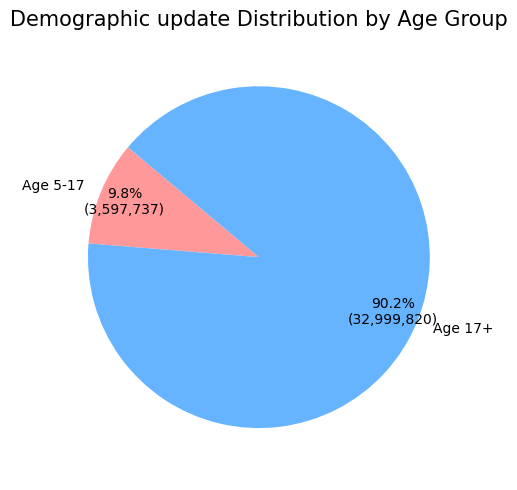

In [34]:
import matplotlib.pyplot as plt

# 1. Define the data
labels = ['Age 5-17', 'Age 17+']
sizes = [3597737, 32999820]
total = sum(sizes)

# 2. Define a function to format the labels
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    # Returns a string with percentage and the absolute value in brackets
    return f"{pct:.1f}%\n({absolute:,})"

# 3. Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: func(pct, sizes), # Use the custom function here
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99'],
    pctdistance=0.85 # Moves the text slightly outward for better readability
)


plt.title('Demographic update Distribution by Age Group', fontsize=15)
plt.axis('equal') 
plt.tight_layout()
plt.show()

Demographic update activity is overwhelmingly adult-centric, with 90.2% of all updates originating from the 17+ population.More than 9 out of every 10 demographic updates are performed by the 17+ age group. 

In contrast to biometric updates, which show near-equal participation across age groups, demographic corrections are driven almost entirely by adult life events such as migration, employment changes, and contact information updates. 

This highlights the fundamentally different operational nature of biometric versus demographic Aadhaar maintenance.

The extremely low share of demographic updates among children indicates that Aadhaar demographic identity for minors remains relatively stable, while adult life transitions create continuous correction demand.


Strong contrast with biometric updates 

biometric distribution:
- ~49% → Age 5–17
- ~51% → Age 17+

Demographic distribution:
- ~10% → Age 5–17
- ~90% → Age 17+
Biometric updates are evenly demanded across age groups, whereas demographic updates are almost exclusively adult-driven.

Operational implication

UIDAI service design should be split:

- Service Type	        -->    Target Group	     -->   Infrastructure Focus

- Biometric updates	   --> Children + Adults	  -->  Schools, camps, enrollment drives

- Demographic updates	  -->  Adults	          -->      Urban centers, CSCs, online services

One service model cannot fit both update types.

#### total demographic updates in state

In [35]:
statewise_sum = df.groupby('state_clean')[['demo_age_5_17', 'demo_age_17_', 'total_demographic']].sum()

In [ ]:
# this is only to save data and use it further for multivarite analysis
# This moves 'state_clean' from the index to a normal column
final_df = statewise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/statewise_data_demographic.csv', index=False)

In [36]:
statewise_sum= statewise_sum.sort_values(by='total_demographic', ascending=False)
statewise_sum

,demo_age_5_17,demo_age_17_,total_demographic
state_clean,,,
Uttar Pradesh,603453,5857058,6460511
Maharashtra,204293,3620599,3824892
Bihar,285883,3352962,3638845
West Bengal,177260,2667088,2844348
Madhya Pradesh,289711,1814924,2104635
Rajasthan,189180,1869717,2058897
Tamil Nadu,242100,1444495,1686595
Andhra Pradesh,227858,1414285,1642143
Chhattisgarh,117797,1303572,1421369


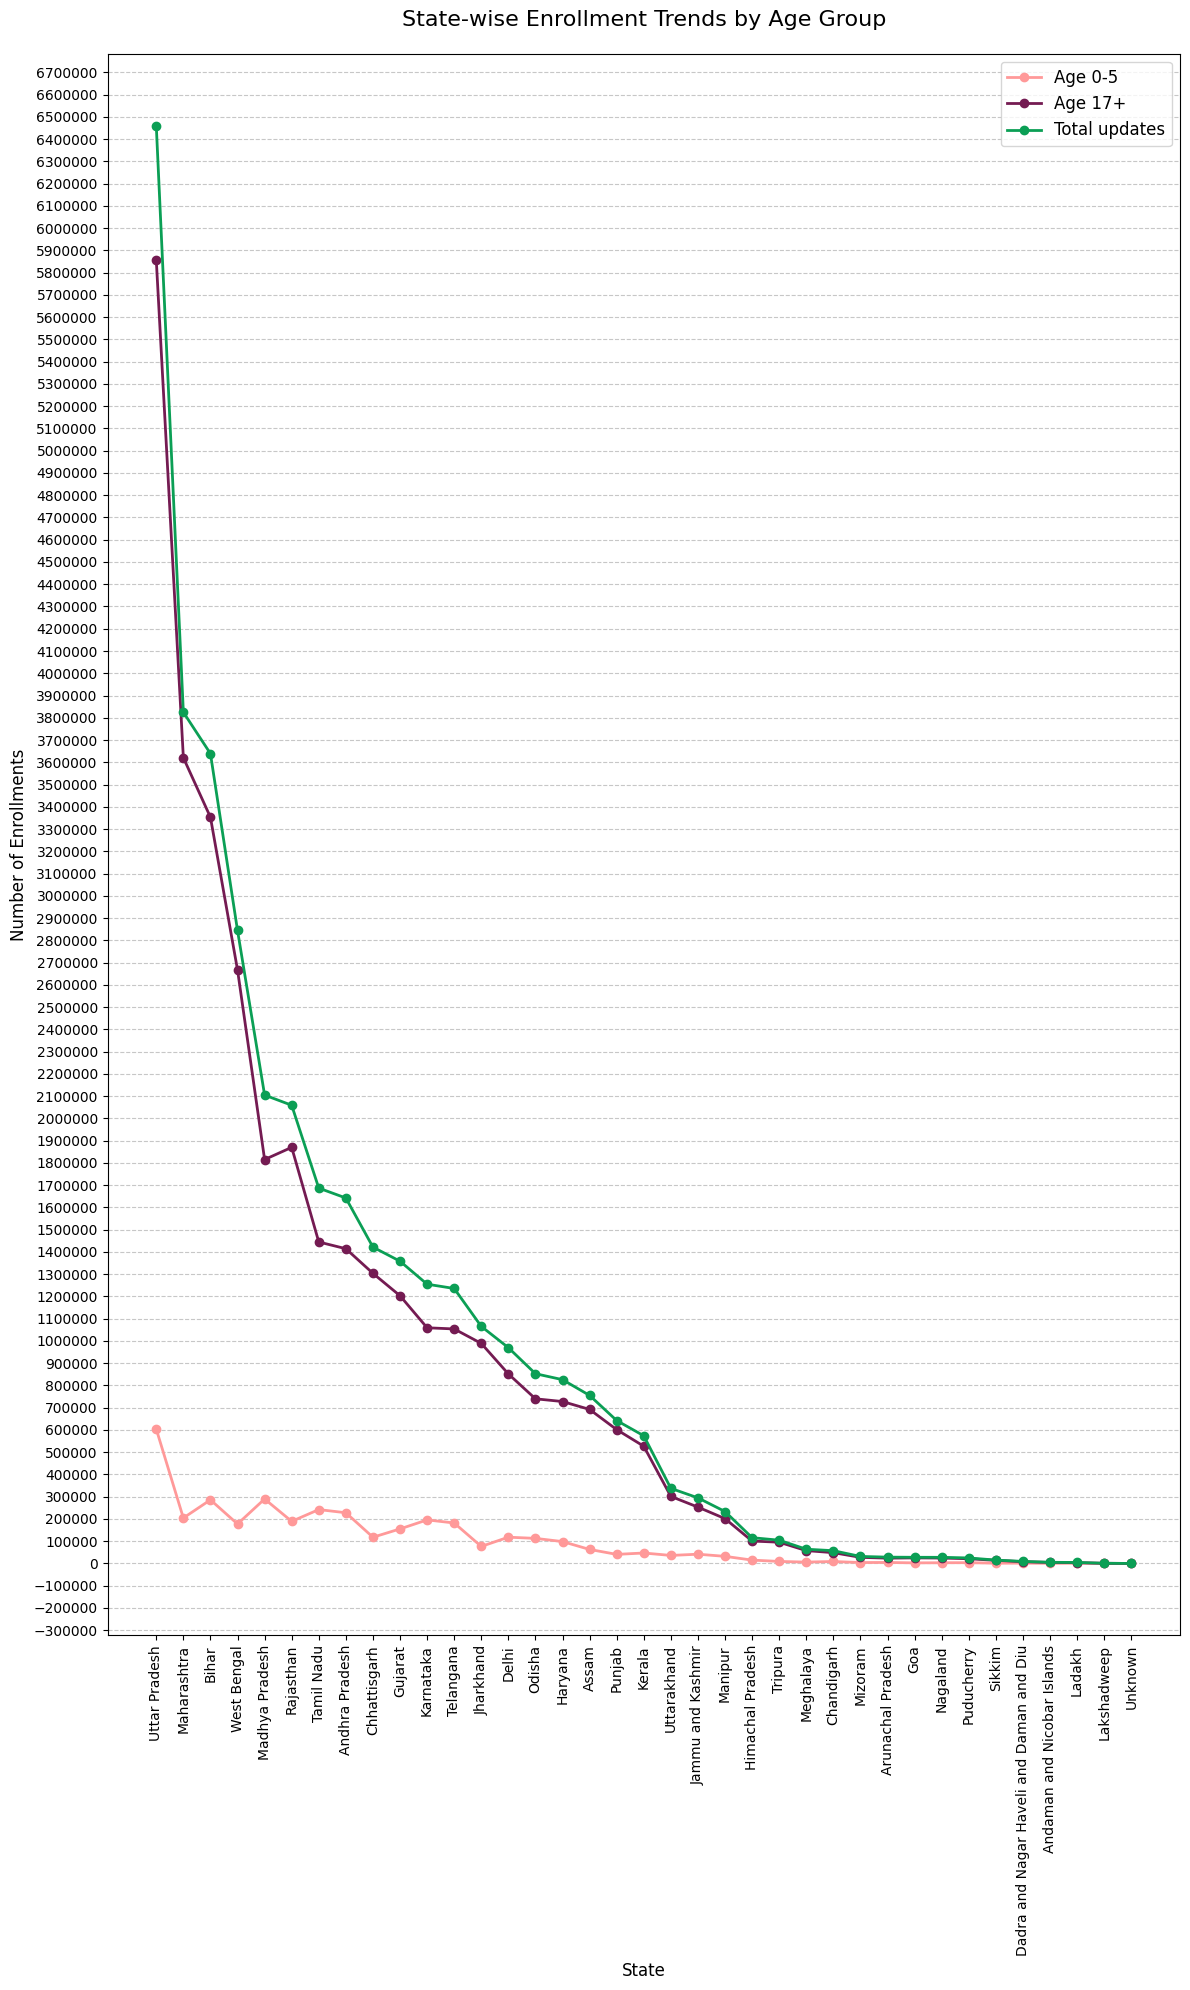

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
state_names = statewise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(12, 20))

# Plot lines for each age group
ax.plot(state_names, statewise_sum['demo_age_5_17'], label='Age 0-5', color='#ff9999', marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['demo_age_17_'], label='Age 17+', color="#741B52", marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['total_demographic'], label='Total updates', color="#0b9f55", marker='o', linewidth=2)


# 3. SET THE Y-AXIS GAP TO 20,000
# This replaces the default 100,000 step with your requested 20,000 step
ax.yaxis.set_major_locator(MultipleLocator(100000))

# 4. Formatting for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot
ax.set_title('State-wise Enrollment Trends by Age Group', fontsize=16, pad=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Enrollments', fontsize=12)

# Rotate labels to prevent overlap
plt.xticks(rotation=90, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

State-wise analysis confirms that demographic updates are overwhelmingly adult-centric in all regions, with children contributing less than 12% even in the highest cases. 

Large, urbanized, and migration-heavy states such as Uttar Pradesh, Maharashtra, Bihar, and West Bengal dominate the national demographic update workload. 

This suggests that Aadhaar demographic services should be primarily designed around adult mobility and identity maintenance rather than child lifecycle updates, unlike biometric services which require balanced demographic infrastructure.

Top 4 states:
Uttar Pradesh,	Maharashtra	,Bihar, West Bengal	Together they contribute ~45% of all demographic updates.

Contrast with biometric dataset 

Aspect	--> Biometric Updates	--> Demographic Updates

Child contribution	--> ~49%	--> ~10%

Adult contribution	--> ~51%	--> ~90%

So:
Biometric updates are lifecycle-driven (growth + aging), while demographic updates are event-driven (migration, employment, contact changes).


#### total demographic updates in different district

In [38]:
districtwise_sum = df.groupby(['state_clean', 'district_clean'])[['demo_age_5_17', 'demo_age_17_', 'total_demographic']].sum().sort_values(by='total_demographic', ascending=False)
districtwise_sum.head(50)

demo_age_5_17  demo_age_17_  \
state_clean    district_clean                                   
West Bengal    North 24 Parganas          31512        478743   
Bihar          East Champaran             27222        341036   
Maharashtra    Thane                      25933        300816   
               Pune                       24139        301944   
Delhi          North East Delhi           43560        266244   
               West Delhi                 34540        242017   
West Bengal    Murshidabad                21879        241150   
Gujarat        Surat                      25207        232030   
Karnataka      Bengaluru                  27746        193576   
Gujarat        Ahmedabad                  23923        180323   
Maharashtra    Solapur                     5877        194089   
Andhra Pradesh East Godavari              23384        176117   
Rajasthan      Jaipur                     20829        173811   
West Bengal    Uttar Dinajpur             12491        181762   
Bihar          Patna                      16295        173838   
Maharashtra    Nashik                     11313        178445   
               Ahmadnagar                  6512        172226   
Uttar Pradesh  Bareilly                   15828        162801   
Maharashtra    Nanded                      5427        170242   
Uttar Pradesh  Ghaziabad                  14456        156234   
               Bijnor                     12583        153196   
West Bengal    Malda                      12968        145011   
Telangana      Hyderabad                  23089        133562   
Bihar          Muzaffarpur                11962        144301   
West Bengal    Paschim Medinipur          10678        144153   
Uttar Pradesh  Lucknow                    11564        142987   
Bihar          Samastipur                 11708        142533   
Maharashtra    Yavatmal                    3823        148806   
Delhi          South Delhi                13929        134412   
Telangana      K.v. Rangareddy            23415        123390   
West Bengal    Barddhaman                  7688        138080   
Bihar          Gaya                       14693        129089   
West Bengal    Nadia                       7030        136278   
               Jalpaiguri                  6346        135809   
Uttar Pradesh  Agra                       15060        126853   
Maharashtra    Mumbai Suburban            14247        126995   
Uttar Pradesh  Raigarh                    12086        128402   
               Allahabad                  14425        124694   
Bihar          Madhubani                  10269        126568   
               Katihar                     8761        126843   
Uttar Pradesh  Kheri                       9195        125522   
West Bengal    Hooghly                     6968        127421   
Uttar Pradesh  Kanpur Nagar               10654        122113   
Maharashtra    Beed                        6937        125795   
Uttar Pradesh  Moradabad                  10721        119077   
               Sitapur                     9247        118065   
               Saharanpur                 10054        117234   
               Azamgarh                   14218        112336   
Bihar          Sitamarhi                   9343        116991   
Madhya Pradesh Indore                     15514        110492   

                                  total_demographic  
state_clean    district_clean                        
West Bengal    North 24 Parganas             510255  
Bihar          East Champaran                368258  
Maharashtra    Thane                         326749  
               Pune                          326083  
Delhi          North East Delhi              309804  
               West Delhi                    276557  
West Bengal    Murshidabad                   263029  
Gujarat        Surat                         257237  
Karnataka      Bengaluru                     221322  
Gujarat        Ahmedabad                     204246  
Mahar

District-level demographic update analysis reveals extreme adult dominance across all high-volume regions, with adult contributions consistently exceeding 90% in most top districts. 

Urban migration hubs such as Pune, Thane, Bengaluru, Hyderabad, Surat, and Delhi districts emerge as the largest demographic update centers, reflecting frequent address and identity corrections driven by workforce mobility. 

Simultaneously, densely populated rural districts in Bihar and Uttar Pradesh also contribute heavily, indicating large-scale administrative correction demand. 

##### West Bengal stands out with the highest concentration of high-volume demographic districts, suggesting sustained identity maintenance activity across the state. In contrast to biometric updates, which often show child-dominant districts, demographic updates are structurally and universally adult-centric

#### this Data created for just predictive model for 
- in this we can predict district wise monthly prediction of biometric update

In [41]:

districtwise_sum_monthly = df.groupby(['state_clean', 'district_clean',df['date'].dt.to_period('M')])[['total_demographic']].sum()
# .sort_values(by='total_enrollments', ascending=False)
districtwise_sum_monthly

total_demographic
state_clean                 district_clean date                      
Andaman and Nicobar Islands Andamans       2025-09                114
                                           2025-10                 66
                                           2025-11                162
                                           2025-12                213
                            Nicobar        2025-03                196
...                                                               ...
West Bengal                 Uttar Dinajpur 2025-12              21107
                            West Medinipur 2025-09                  5
                                           2025-10                  1
                                           2025-11                  1
                                           2025-12                  2

[5247 rows x 1 columns]

In [42]:
# This moves 'state_clean' from the index to a normal column
final_dff = districtwise_sum_monthly.reset_index()
final_dff.to_csv('../Data/predictive_data/districtwise_sum_monthly_demo.csv', index=False)

#### total demographic updates in different pincode

In [41]:
pincode_total = (
    df.groupby('pincode')['total_demographic']
      .sum()
      .reset_index()
      .sort_values('total_demographic', ascending=False)
)
print(pincode_total.head(100))


       pincode  total_demographic
2682    244001              78264
57      110059              70540
90      110094              67682
3591    283203              63128
1639    202001              62015
...        ...                ...
1701    203131              19557
2890    247776              19540
8324    495115              19498
7405    451551              19390
19711   854317              19269

[100 rows x 2 columns]


### Trends based on dates

#### Monthly biometric updates in country 

In [39]:
monthwise_sum = df.groupby( df['date'].dt.to_period('M'))[['demo_age_5_17', 'demo_age_17_', 'total_demographic']].sum()
monthwise_sum


,demo_age_5_17,demo_age_17_,total_demographic
date,,,
2025-03,721108,7469044,8190152
2025-04,119936,787346,907282
2025-05,123211,816557,939768
2025-06,122903,918041,1040944
2025-07,195587,1315305,1510892
2025-09,630827,5342432,5973259
2025-10,366712,3466443,3833155
2025-11,617192,6467113,7084305
2025-12,700261,6417541,7117802


In [ ]:
# this data store for further multi-variate analysis with demographic and enrollment data
# This moves 'state_clean' from the index to a normal column
final_df = monthwise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/monthwise_data_demographic.csv', index=False)

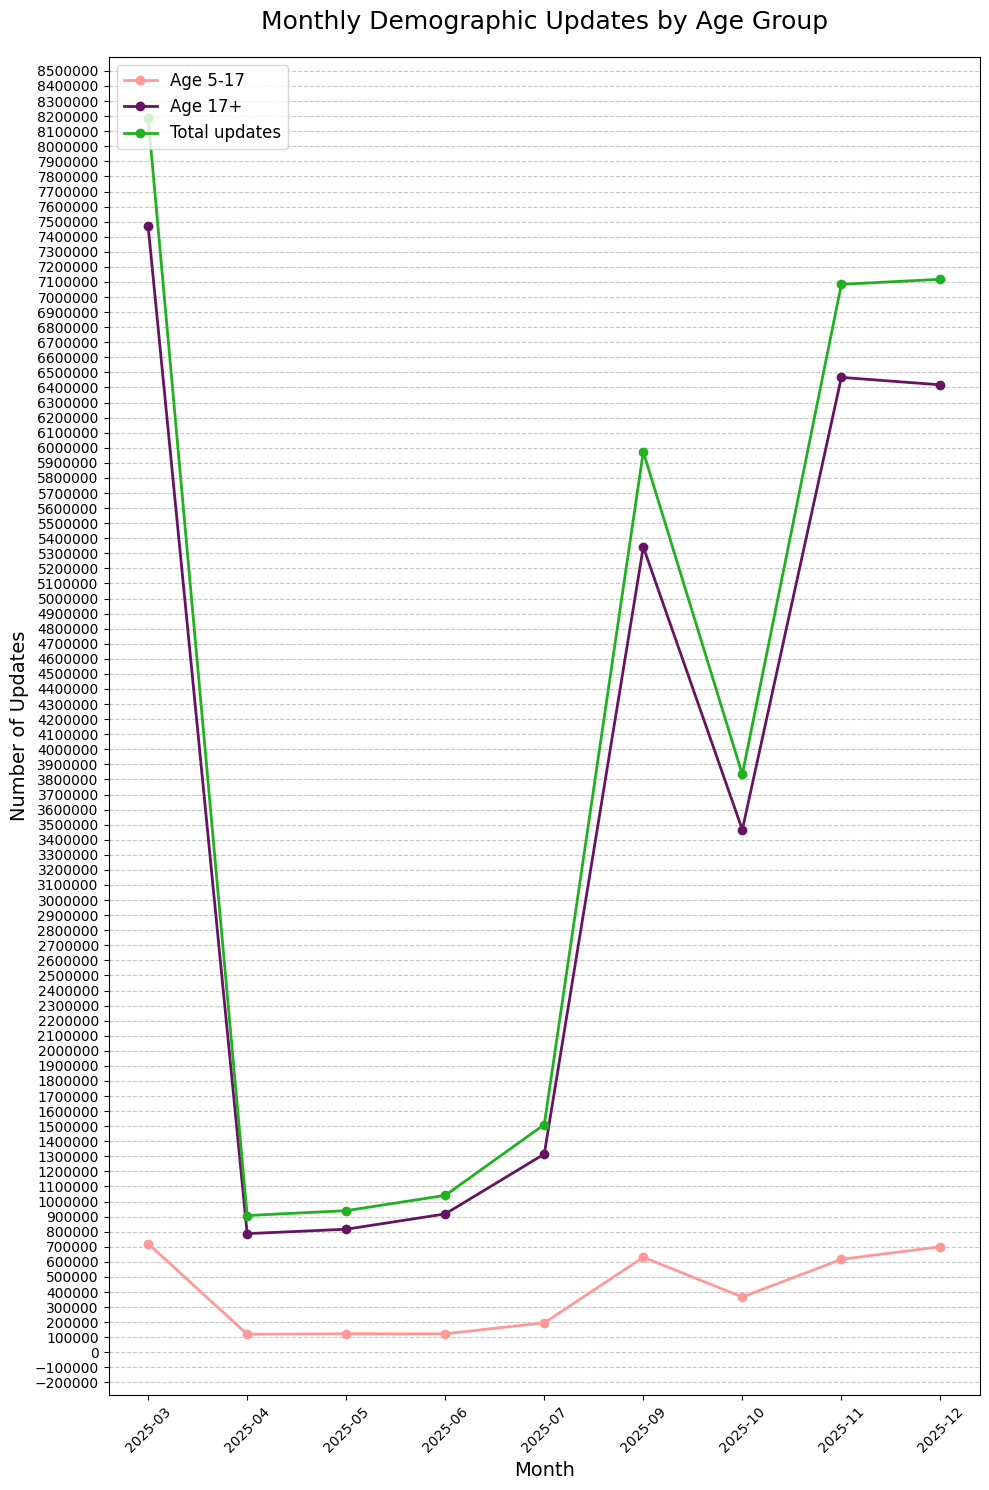

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
# We assume 'monthwise_sum' is your DataFrame indexed by month
dates = monthwise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(10, 15))

# Plot lines for each age group
ax.plot(dates, monthwise_sum['demo_age_5_17'], label='Age 5-17', color='#ff9999', marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['demo_age_17_'], label='Age 17+', color="#661461", marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['total_demographic'], label='Total updates', color="#20b020", marker='o', linewidth=2)

# 3. Set the Y-axis interval to 30,000
ax.yaxis.set_major_locator(MultipleLocator(100000))

# 4. Format for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot appearance
ax.set_title('Monthly Demographic Updates by Age Group', fontsize=18, pad=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Updates', fontsize=14)

# Rotate date labels for better fit
plt.xticks(rotation=45, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()

Monthly demographic update trends reveal a clear administrative rhythm. Early months contain snapshot-based aggregates and are unsuitable for temporal inference. 

True operational activity begins from September 2025, where volumes stabilize between 3.8–7.1 million updates per month. 

October shows a pronounced dip, likely caused by reduced operational days during major festivals and service interruptions, followed by a strong rebound in November and sustained high activity in December, suggesting backlog clearance and compliance pressure toward year-end. 

Across all months, demographic updates remain structurally adult-dominated, with approximately 90% of updates originating from the 17+ population, confirming that demographic maintenance is driven by adult mobility and administrative life events.

#### Monthly demographic updates in country 

In [42]:
# statewise monthwise sum
state_monthwise_sum = df.groupby(['state_clean', df['date'].dt.to_period('M')])[['demo_age_5_17', 'demo_age_17_', 'total_demographic']].sum()

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(state_monthwise_sum)
state_monthwise_sum # comment this if uncommented above

demo_age_5_17  demo_age_17_  \
state_clean                 date                                   
Andaman and Nicobar Islands 2025-03            100           831   
                            2025-07             20           199   
                            2025-09             61           729   
                            2025-10             61           489   
                            2025-11            105          1050   
...                                            ...           ...   
West Bengal                 2025-07          10481        100349   
                            2025-09          41250        620262   
                            2025-10          19868        382904   
                            2025-11          32984        587714   
                            2025-12          35118        469985   

                                     total_demographic  
state_clean                 date                        
Andaman and Nicobar Islands 2025-03                931  
                            2025-07                219  
                            2025-09                790  
                            2025-10                550  
                            2025-11               1155  
...                                                ...  
West Bengal                 2025-07             110830  
                            2025-09             661512  
                            2025-10             402772  
                            2025-11             620698  
                            2025-12             505103  

[270 rows x 3 columns]

State-wise monthly analysis of Aadhaar demographic updates reveals a consistent two-phase data structure: early months reflect batch snapshot artifacts, while true operational behavior begins in September 2025. 

Across all states and months, demographic updates are overwhelmingly adult-driven, with adults contributing over 90% of total volume. 

A nationwide operational slowdown is visible in October, likely due to reduced service availability during major festivals, followed by a strong rebound in November and December, indicating backlog clearance and year-end administrative push. 

Maharashtra shows an exceptional spike in November, suggesting a state-specific demographic correction drive or system migration event. 

Overall, demographic update activity follows administrative and institutional rhythms rather than biological or lifecycle patterns.

#### day by day no of updates

In [44]:
national_daily = (
    df.groupby('date')['total_demographic']
      .sum()
      .reset_index()
      .sort_values('date')
)

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(national_daily)
national_daily # comment this if uncommented above

,date,total_demographic
0,2025-03-01,8190152
1,2025-04-01,907282
2,2025-05-01,939768
3,2025-06-01,1040944
4,2025-07-01,1510892
...,...,...
90,2025-12-25,201219
91,2025-12-26,296581
92,2025-12-27,302351
93,2025-12-28,169607


Daily national demographic update volumes stabilize between 2–4 lakh records per day during normal operations. 

The dataset clearly separates batch snapshot artifacts (early months) from real-time operational data starting in September 2025. 

Strong weekend and holiday effects are visible, with activity dropping below 1 lakh on non-working days. 

Several extreme low-count days (e.g., 22–23 October and 18 December) indicate partial ingestion or ETL failures and must be treated as data anomalies. 

Peak daily throughput reaches approximately 4.7 lakh updates, reflecting the operational capacity of the Aadhaar demographic correction system. Compared to biometric updates, demographic workloads are slightly lower but more stable in daily volume.

#### Statistical Measures

In [45]:
df[['demo_age_5_17','demo_age_17_','total_demographic']].describe()

,demo_age_5_17,demo_age_17_,total_demographic
count,1.598099e+06,1.598099e+06,1.598099e+06
mean,2.251260e+00,2.064942e+01,2.290068e+01
std,1.391927e+01,1.177073e+02,1.297485e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,3.000000e+00
50%,1.000000e+00,6.000000e+00,7.000000e+00
75%,2.000000e+00,1.500000e+01,1.700000e+01
max,2.690000e+03,1.616600e+04,1.694200e+04


In [46]:
# Skewness
print("skewness:")
print(df[['demo_age_5_17','demo_age_17_','total_demographic']].skew())

print("\nkurtosis:")
print(df[['demo_age_5_17','demo_age_17_','total_demographic']].kurtosis())

skewness:
demo_age_5_17        44.858431
demo_age_17_         36.472672
total_demographic    36.137653
dtype: float64

kurtosis:
demo_age_5_17        4153.689876
demo_age_17_         2454.417255
total_demographic    2379.851096
dtype: float64


The demographic update dataset exhibits extreme positive skewness (≈36–45) and extraordinarily high kurtosis (>2000), indicating a highly bursty, zero-inflated workload dominated by rare, massive batch updates. 

Median values (≈7 updates per record) provide a far more realistic representation of typical operations than the mean. This confirms that Aadhaar demographic update activity follows a heavy-tailed, batch-driven distribution rather than any classical statistical distribution.